<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/EulerIdentity_trigIdentity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Euler's Identity to Trigonometric Identities</h1></b>

Dr. Bingsen Wang

6/18/2023
</center>

#Euler's Identity

The Euler's identity is described by
$$e^{j\theta} = \cos\theta + j\sin\theta \tag{1}$$

#Trigonometric Identities

Based on (1), we have
$$e^{j(\theta_1+\theta_2)} = \cos(\theta_1+\theta_2) + j\sin(\theta_1+\theta_2)\tag{2}$$

On the other hand,
$$e^{j(\theta_1+\theta_2)} = e^{j\theta_1}e^{j\theta_2}=(\cos\theta_1 + j\sin\theta_1)(\cos\theta_2 + j\sin\theta_2)\tag{3}$$

Equating the real compoents of (2) and (3) yields
$$\cos(\theta_1+\theta_2) = \cos\theta_1\cos\theta_2 - \sin\theta_1\sin\theta_2\tag{4}$$

Equating the imaginary compoents of (2) and (3) yields
$$\sin(\theta_1+\theta_2) = \sin\theta_1\cos\theta_2 + \cos\theta_1\sin\theta_2\tag{5}$$

Quite a number of other trig identities are readily to be derived from (4) and (5) by letting $\theta_1=\theta_2$ or $\theta_2=\pm\pi$ or $\theta_2=\pm{\pi\over2}$

#Python Code


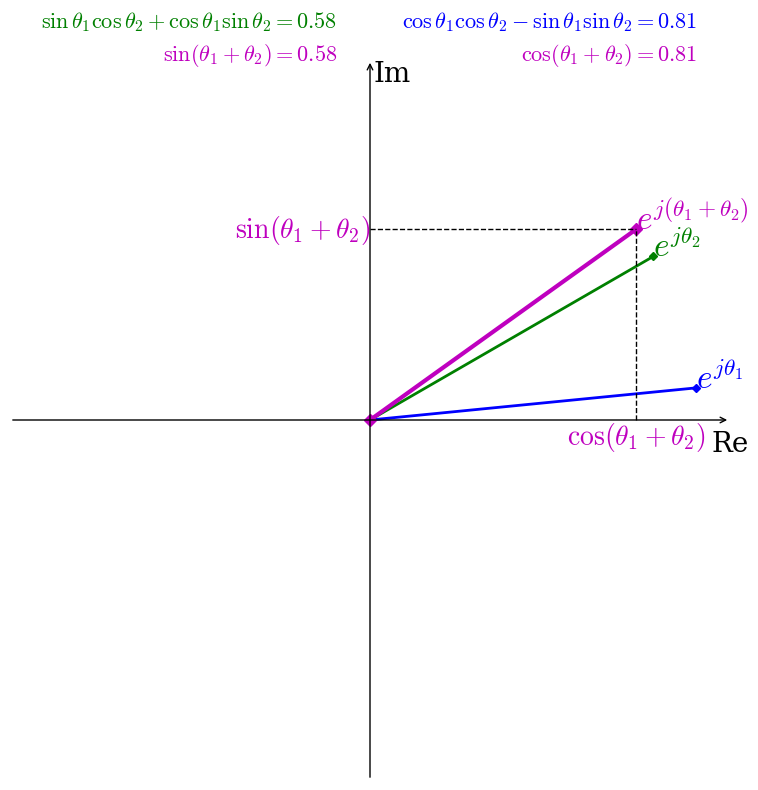

In [25]:
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

#parameters
Nf = 300
theta1=linspace(pi/32,2*pi/3,Nf)
theta2=linspace(pi/6,1.5*pi,Nf)
z1 = exp(1j*theta1)
z2 = exp(1j*theta2)
z3=z1*z2
fig = plt.figure(figsize=(9,9))
fig.tight_layout()
ax=fig.add_axes((.1,.1,.8,.8),xlim=[-1.1,1.1], ylim=[-1.1,1.1],fc='none') #no fc
ax.axis('off') #turn off axis frames
ax.annotate("", (1.1, 0), (-1.1, 0),arrowprops={'arrowstyle':"->"}) #x-axis
ax.annotate("", (0,1.1), (0,-1.1),arrowprops={'arrowstyle':"->"}) #y-axis
ax.text(1.1,-.03,'Re',size=20,va='top',ha='center') #x-axis label
ax.text(0.01,1.1,'Im',size=20,va='top') #y label
tcos = ax.text(z3[0].real,0,r'$\cos(\theta_1+\theta_2)$', size = 20,va='top',ha='center',color='m')
tsin = ax.text(0,z3[0].imag,r'$\sin(\theta_1+\theta_2)$', size = 20,va='center',ha='right',color='m')
tclx1 = ax.text(z1[0].real,z1[0].imag,r'$e^{j\theta_1}$', size = 24,color='b')
tclx2 = ax.text(z2[0].real,z2[0].imag,r'$e^{j\theta_2}$', size = 24,color='g')
tclx3 = ax.text(z3[0].real,z3[0].imag,r'$e^{j(\theta_1+\theta_2)}$', size = 24,color='m')
tx1=ax.text(1,1.2,'', size = 16,color='b',ha='right')
tx2=ax.text(1,1.1,'', size = 16,color='m',ha='right')
tx3=ax.text(-.1,1.2,'', size = 16,color='g',ha='right')
tx4=ax.text(-.1,1.1,'', size = 16,color='m',ha='right')

lines = [] #array containing all the line segments
lines.append(ax.plot([], [], '-D',markersize=4, lw=2, color='b')[0]) #e^jtheta1
lines.append(ax.plot([], [], '-D',markersize=4, lw=2, color='g')[0]) #e^jtheta1
lines.append(ax.plot([], [], '-D',markersize=6, lw=3, color='m')[0]) #lines to plot
lines.append(ax.plot([], [], '--k', lw=1)[0]) #real
lines.append(ax.plot([], [], '--k', lw=1)[0]) #imag


# animation function. This is called sequentially
def animate(i):
  lines[0].set_data([0,z1[i].real],[0,z1[i].imag])
  lines[1].set_data([0,z2[i].real],[0,z2[i].imag])
  lines[2].set_data([0,z3[i].real],[0,z3[i].imag])
  lines[3].set_data([z3[i].real,z3[i].real],[0,z3[i].imag])
  lines[4].set_data([0,z3[i].real],[z3[i].imag,z3[i].imag])
  tcos.set_position((z3[i].real,0))
  tsin.set_position((0,z3[i].imag))
  tclx1.set_position((z1[i].real,z1[i].imag))
  tclx2.set_position((z2[i].real,z2[i].imag))
  tclx3.set_position((z3[i].real,z3[i].imag))
  tx1.set_text(r'$\cos\theta_1\cos\theta_2-\sin\theta_1\sin\theta_2='+str(round(z1[i].real*z2[i].real-z1[i].imag*z2[i].imag,2))+'$')
  tx2.set_text(r'$\cos(\theta_1+\theta_2)='+str(round(z3[i].real,2))+'$')
  tx3.set_text(r'$\sin\theta_1\cos\theta_2+\cos\theta_1\sin\theta_2='+str(round(z1[i].imag*z2[i].real+z1[i].real*z2[i].imag,2))+'$')
  tx4.set_text(r'$\sin(\theta_1+\theta_2)='+str(round(z3[i].imag,2))+'$')
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"EulerIdentity2TrigIdentities.mp4"
writervideo = animation.FFMpegWriter(fps=20)
anim.save(fn, writer=writervideo,dpi = 120)

#debug
